In [1]:
#Importando as bibliotecas e os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
notas

,nota_1,nota_2,resultado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [2]:
# Função para mostrar gráficamento os alunos aprovados e reprovados
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

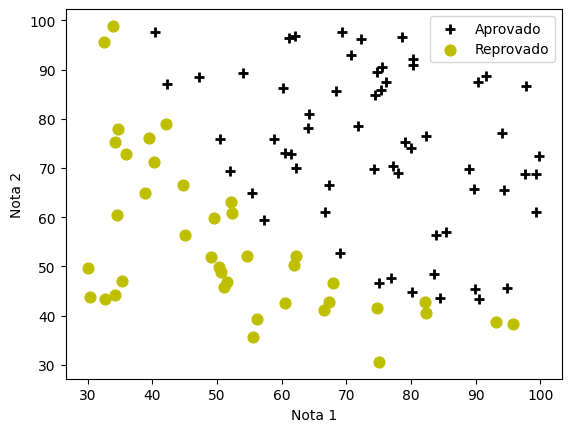

In [3]:
plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

In [4]:
import math
def sigmoide(nota1,nota2,peso1,peso2,c):
  return 1.0 / (math.exp(-((nota1*peso1)+(nota2*peso2)+c)))

In [5]:
#Funcao de predicao
def predicao(x, a , b):
    return (a * x) + b

In [6]:
# Funcao de perda
def erro_quadratico_medio(y, p):
    return np.sum((y-p)**2) / len(y)

In [7]:
def gradient_descent(x, y, iteracoes = 1000, alfa = 0.0001, limite_parada = 1e-6):

    # inicializando valores
    a = 0.1
    b = 0.01
    n = float(len(x))
    
    perdas = []
    variacoes_a = []
    perda_anterior = float('inf')
    
    for i in range(iteracoes):

        # Fazendo a predição com a e b atuais
        p = predicao(x,a,b)
        
        # Cálculo do valor de perda
        perda_atual = erro_quadratico_medio(y, p)

        # Para se a diferença da perda 
        if abs(perda_anterior - perda_atual) <= limite_parada:
            return a, b, perdas, variacoes_a

        perda_anterior = perda_atual

        perdas.append(perda_atual)
        variacoes_a.append(a)

        # Cálculo do gradiente
        derivada_a = -(2/n) * sum(x * (y-p))
        derivada_b = -(2/n) * sum(y-p)

        a = a - (alfa * derivada_a)
        b = b - (alfa * derivada_b)

    return a, b, perdas, variacoes_a

In [13]:
# Estimando o peso de A e B
a, b, perdas, variacoes_a = gradient_descent(notas["nota_1"], notas["nota_2"], iteracoes=2000)
print(f"A: {a}\nB: {b}")

A: 0.8960996684356014
B: 2.1534277162563624


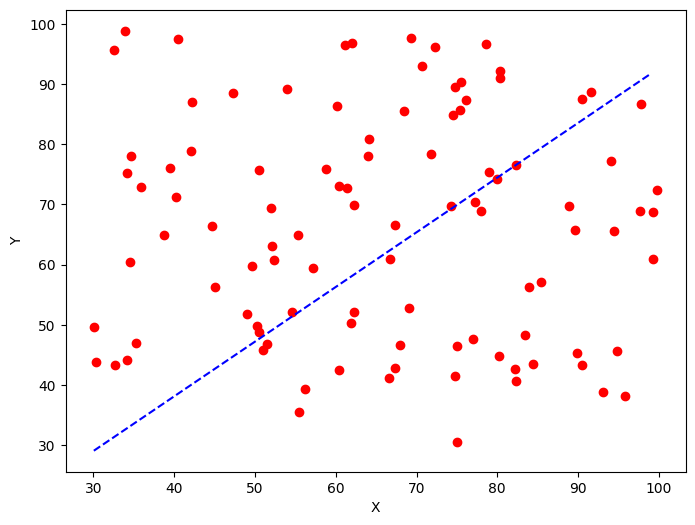

In [18]:
# Fazendo as predições com os dados estimados
Y_pred = predicao(notas['nota_1'], a, b)

# Plotando os mesmos dados com a linha
plt.figure(figsize = (8,6))
plt.scatter(notas['nota_1'], notas['nota_2'], marker='o', color='red')
plt.plot([min(notas['nota_1']), max(notas['nota_2'])], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
    markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

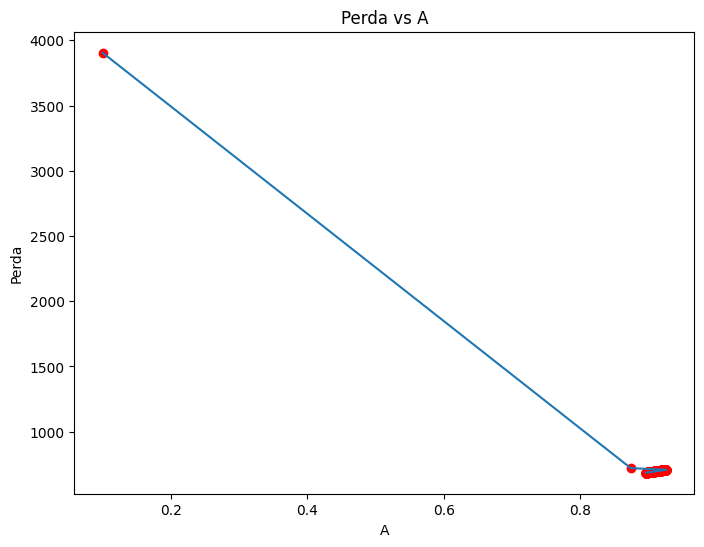

In [19]:
	# Plotando os valores de A e a perda
	plt.figure(figsize = (8,6))
	plt.plot(variacoes_a, perdas)
	plt.scatter(variacoes_a, perdas, marker='o', color='red')
	plt.title("Perda vs A")
	plt.ylabel("Perda")
	plt.xlabel("A")
	plt.show()